<a href="https://colab.research.google.com/github/Saitejamacha/Data_Science_-_AI_ML/blob/main/Netflix_Recommendation_Capstron_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Allocating column names to data frame
df = pd.read_csv(r'movie_titles.csv',
                 header=None,
                 names=['movie_id', 'year', 'title'],
                 encoding='latin1',
                on_bad_lines='skip')

In [3]:
df.head()

,movie_id,year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [4]:
# Year Convertion from float to int
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')

In [5]:
df.head()

,movie_id,year,title
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [6]:
df_new = pd.read_csv(r'combined_data_1.txt')

In [7]:
# combined data contains movie_id, user_id, rating, date
df_new.head()

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03


In [8]:

file_path = r'combined_data_1.txt'

movie_id = 0
data = {'movie_id': [], 'user_id': [], 'rating': [], 'date': []}

with open(file_path, 'r', encoding='latin1') as f:
    for line in f:
        line = line.strip()
        if line.endswith(':'):
            movie_id = int(line[:-1])
        else:
            try:
                user_id, rating, date = line.split(',')
                data['movie_id'].append(movie_id)
                data['user_id'].append(int(user_id))
                data['rating'].append(int(rating))
                data['date'].append(date)
            except ValueError:
                continue

ratings = pd.DataFrame(data)



In [9]:
print(ratings.head())

   movie_id  user_id  rating        date
0         1  1488844       3  2005-09-06
1         1   822109       5  2005-05-13
2         1   885013       4  2005-10-19
3         1    30878       4  2005-12-26
4         1   823519       3  2004-05-03


In [10]:
# merging movie titles and combined data datasets

df = ratings.merge(df, on='movie_id', how='left')

In [11]:
df

,movie_id,user_id,rating,date,year,title
0,1,1488844,3,2005-09-06,2003,Dinosaur Planet
1,1,822109,5,2005-05-13,2003,Dinosaur Planet
2,1,885013,4,2005-10-19,2003,Dinosaur Planet
3,1,30878,4,2005-12-26,2003,Dinosaur Planet
4,1,823519,3,2004-05-03,2003,Dinosaur Planet
...,...,...,...,...,...,...
24053759,4499,2591364,2,2005-02-16,2002,In My Skin
24053760,4499,1791000,2,2005-02-10,2002,In My Skin
24053761,4499,512536,5,2005-07-27,2002,In My Skin
24053762,4499,988963,3,2005-12-20,2002,In My Skin


In [12]:
# popular movies by count of ratings

top_movies = (
    df.groupby('title')['rating']
    .count()
    .sort_values(ascending=False)
    .head(15)
    .index.tolist()
)

print(top_movies)

['Pirates of the Caribbean: The Curse of the Black Pearl', 'What Women Want', 'Bruce Almighty', 'The Italian Job', 'American Beauty', 'Shrek 2', 'The Sixth Sense', 'Lord of the Rings: The Fellowship of the Ring', '50 First Dates', 'Finding Nemo (Widescreen)', 'The Wedding Planner', 'The Last Samurai', 'The Bourne Supremacy', 'Men in Black II', 'Braveheart']


In [13]:

# Manual genre mapping for known titles
genre_map = {
    'Dinosaur Planet': 'Documentary',
    'Isle of Man TT 2004 Review': 'Sports',
    'Character': 'Drama',
    "Paula Abdul's Get Up & Dance": 'Music',
    'The Rise and Fall of ECW': 'Sports'
}

# Keyword based fallback extraction function
genre_keywords = {
    'Love': 'Romance',
    'War': 'War',
    'Dance': 'Music',
    'Planet': 'Documentary',
    'Football': 'Sports',
    'Horror': 'Horror',
    'Adventure': 'Action',
    'Comedy': 'Comedy',
    'Life': 'Drama',
    'Crime': 'Thriller',
    'World': 'Documentary',
    'Space': 'Sci-Fi',
    'Battle': 'Action',
    'Police': 'Crime',
    'Ghost': 'Horror',
    'Heart': 'Romance',
}

def extract_genre(title):
    """Heuristic extraction of genre from movie title."""
    for word, genre in genre_keywords.items():
        if word.lower() in str(title).lower():
            return genre
    return 'Unknown'

# manual mapping
df['genre'] = df['title'].map(genre_map)

# keyword extraction for remaining movies
df['genre'] = np.where(df['genre'].isna(), df['title'].apply(extract_genre), df['genre'])

df[['title', 'genre']].head(85)


,title,genre
0,Dinosaur Planet,Documentary
1,Dinosaur Planet,Documentary
2,Dinosaur Planet,Documentary
3,Dinosaur Planet,Documentary
4,Dinosaur Planet,Documentary
...,...,...
80,Dinosaur Planet,Documentary
81,Dinosaur Planet,Documentary
82,Dinosaur Planet,Documentary
83,Dinosaur Planet,Documentary


In [14]:
df['genre'].unique()

array(['Documentary', 'Sports', 'Drama', 'Music', 'Unknown', 'Romance',
       'Horror', 'War', 'Sci-Fi', 'Action', 'Crime', 'Thriller', 'Comedy'],
      dtype=object)

In [15]:
df.head()

,movie_id,user_id,rating,date,year,title,genre
0,1,1488844,3,2005-09-06,2003,Dinosaur Planet,Documentary
1,1,822109,5,2005-05-13,2003,Dinosaur Planet,Documentary
2,1,885013,4,2005-10-19,2003,Dinosaur Planet,Documentary
3,1,30878,4,2005-12-26,2003,Dinosaur Planet,Documentary
4,1,823519,3,2004-05-03,2003,Dinosaur Planet,Documentary


# 1. Find out the list of most popular and liked genre

In [16]:
# Calculate genre stats

genre_stats = (
    df.groupby('genre')['rating']
    .agg(['count', 'mean'])
    .reset_index()
    .rename(columns={'count': 'num_ratings', 'mean': 'avg_rating'})
)

filtered_genre_stats = genre_stats[genre_stats['genre'] != 'Unknown']

most_popular_genre = filtered_genre_stats.sort_values('num_ratings', ascending=False).head(10)
most_liked_genre   = filtered_genre_stats.sort_values('avg_rating', ascending=False).head(10)



In [17]:
print(most_popular_genre)

          genre  num_ratings  avg_rating
7       Romance       448102    3.720617
5        Horror       333101    3.553084
12          War       224098    3.699020
3   Documentary       217172    3.343364
4         Drama       202804    3.520503
0        Action        58259    3.683019
8        Sci-Fi        38307    3.446602
2         Crime        28341    3.474930
6         Music        13101    3.445157
1        Comedy         9778    3.184496


In [18]:
print(most_liked_genre)

          genre  num_ratings  avg_rating
9        Sports         1285    3.878599
7       Romance       448102    3.720617
12          War       224098    3.699020
0        Action        58259    3.683019
5        Horror       333101    3.553084
4         Drama       202804    3.520503
2         Crime        28341    3.474930
8        Sci-Fi        38307    3.446602
6         Music        13101    3.445157
3   Documentary       217172    3.343364


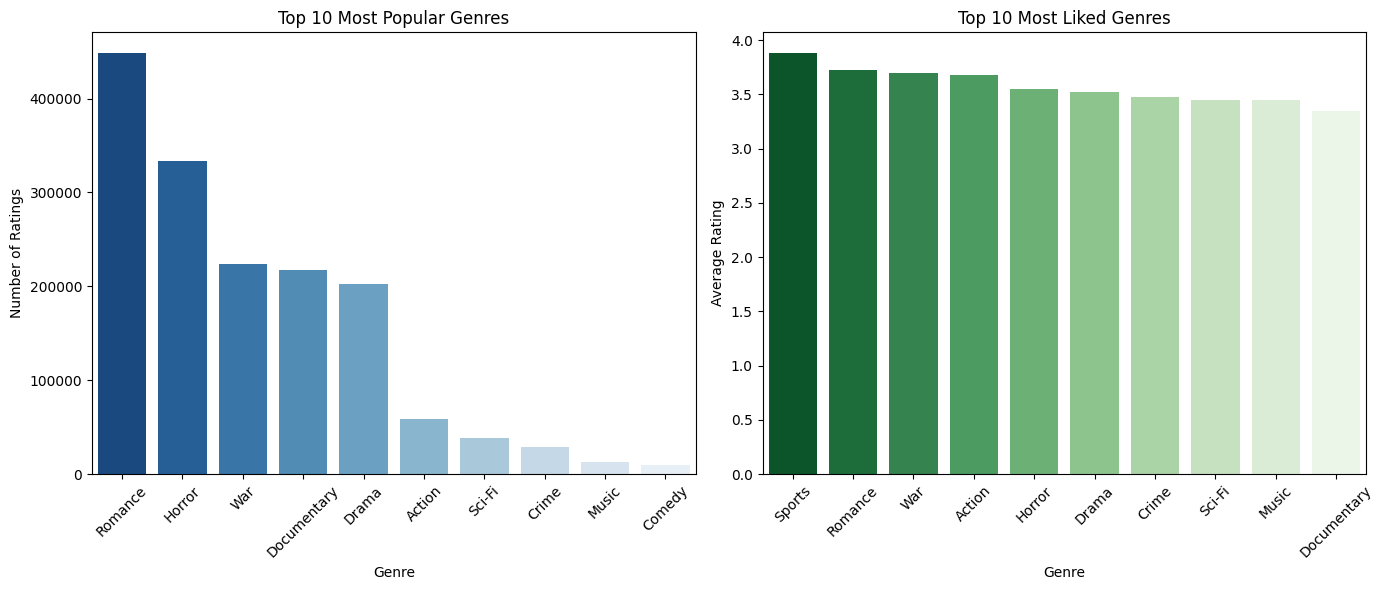

In [19]:

plt.figure(figsize=(14,6))

# Popular genres
plt.subplot(1,2,1)
sns.barplot(data=most_popular_genre, x='genre', y='num_ratings', hue='genre', dodge=False, legend=False, palette='Blues_r')
plt.title('Top 10 Most Popular Genres')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')

# Liked genres
plt.subplot(1,2,2)
sns.barplot(data=most_liked_genre, x='genre', y='avg_rating', hue='genre', dodge=False, legend=False, palette='Greens_r')
plt.title('Top 10 Most Liked Genres')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

# 2. Create Model that finds the best suited Movie for one user in every genre

In [20]:

def best_movies_per_genre_for_user(df, user_id, top_n=1):

    df = df.dropna(subset=['rating'])

    # Movies already rated by the user
    watched = df[df['user_id'] == user_id]['title'].unique()

    # Average rating per movie within each genre
    genre_movie_ratings = (
        df.groupby(['genre', 'title'])['rating']
        .mean()
        .reset_index()
        .rename(columns={'rating': 'avg_rating'})
    )

    # Remove already watched movies
    genre_movie_ratings = genre_movie_ratings[~genre_movie_ratings['title'].isin(watched)]

    # Get top N movies per genre
    best_per_genre = (
        genre_movie_ratings
        .sort_values(['genre', 'avg_rating'], ascending=[True, False])
        .groupby('genre')
        .head(top_n)
        .sort_values('avg_rating', ascending=False)
        .reset_index(drop=True)
    )

    return best_per_genre

# Example usage
user_id_example = df['user_id'].iloc[0]
best_for_user = best_movies_per_genre_for_user(df, user_id_example, top_n=1)

print(f"Best suited movies for User {user_id_example} in every genre:")
print(best_for_user)



Best suited movies for User 1488844 in every genre:
          genre                                              title  avg_rating
0       Unknown                                     Lost: Season 1    4.670989
1        Horror   Ghost in the Shell: Stand Alone Complex: 2nd Gig    4.586364
2           War                            The Simpsons: Bart Wars    4.309862
3       Romance                              I Love Lucy: Season 5    4.192128
4        Sci-Fi  VeggieTales Classics: Larry-Boy & The Fib from...    4.189387
5         Drama                                  The Life of Birds    4.164071
6        Action                              The Battle of Algiers    4.123802
7   Documentary                    Dragon Ball Z: World Tournament    3.981117
8         Music             Dora the Explorer: Dance to the Rescue    3.931973
9        Sports                           The Rise and Fall of ECW    3.919298
10     Thriller  Burn Up Excess: Vol. 2: Crimes and Missed Deme...    3.654596


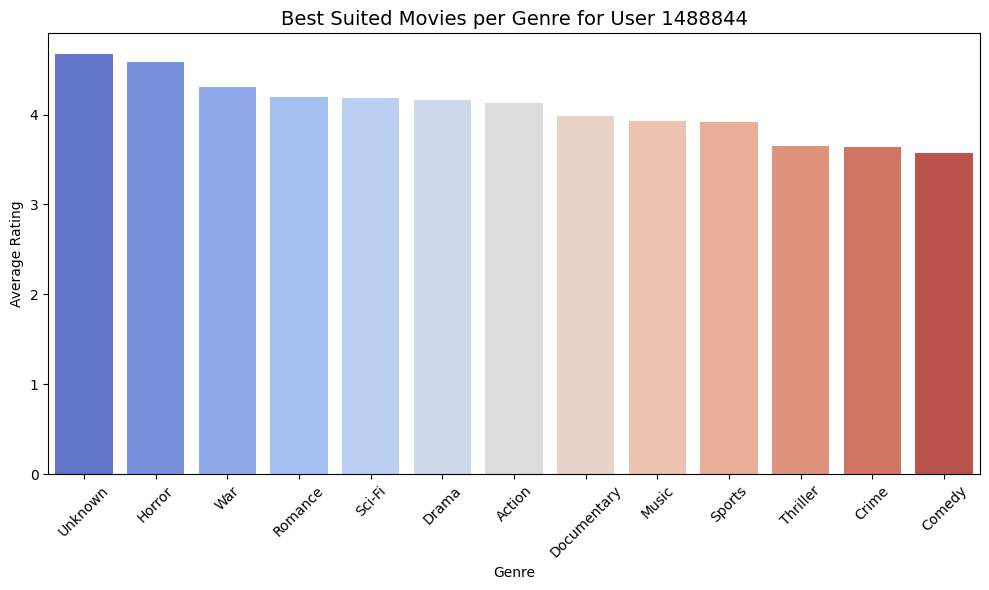

In [21]:

plt.figure(figsize=(10,6))
sns.barplot(data=best_for_user, x='genre', y='avg_rating', hue='genre', dodge=False, legend=False, palette='coolwarm',)
plt.title(f"Best Suited Movies per Genre for User {user_id_example}", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()



 # 3. Find what Genre Movies have received the best and worst ratings based on User Rating

In [22]:

#  Statistics per genre
genre_summary = (
    df.groupby('genre')['rating']
      .agg(['mean', 'count'])
      .reset_index()
      .rename(columns={'mean': 'avg_rating', 'count': 'num_ratings'})
)


best_genres = genre_summary.sort_values('avg_rating', ascending=False).head(5)
worst_genres = genre_summary.sort_values('avg_rating', ascending=True).head(5)

print("Best Genres with Highest Average Ratings:")
print(best_genres)

print("Worst Genres with Lowest Average Ratings:")
print(worst_genres)


Best Genres with Highest Average Ratings:
      genre  avg_rating  num_ratings
9    Sports    3.878599         1285
7   Romance    3.720617       448102
12      War    3.699020       224098
0    Action    3.683019        58259
11  Unknown    3.600629     22476988
Worst Genres with Lowest Average Ratings:
          genre  avg_rating  num_ratings
10     Thriller    3.032949         2428
1        Comedy    3.184496         9778
3   Documentary    3.343364       217172
6         Music    3.445157        13101
8        Sci-Fi    3.446602        38307


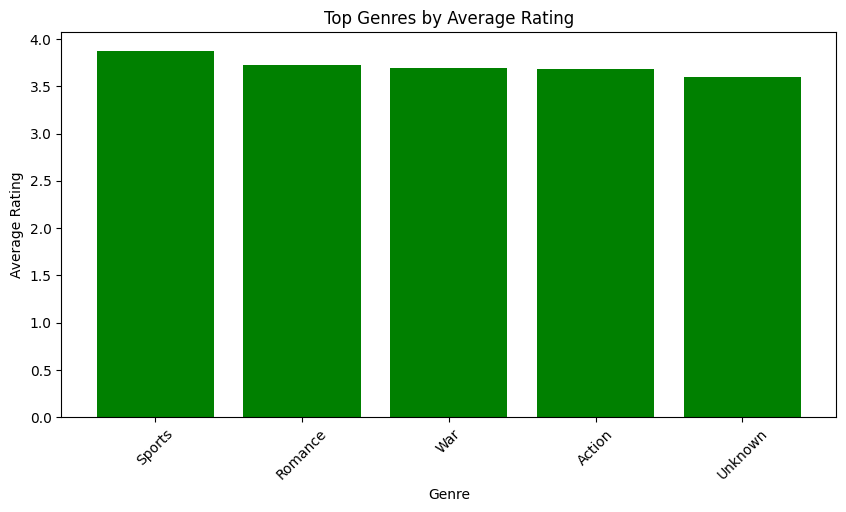

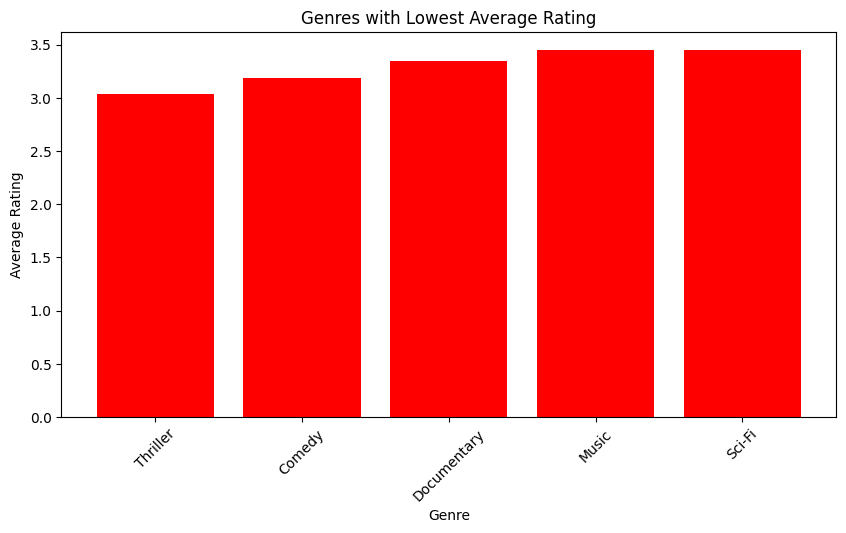

In [25]:

plt.figure(figsize=(10,5))
plt.bar(best_genres['genre'], best_genres['avg_rating'], color='green')
plt.title('Top Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
plt.bar(worst_genres['genre'], worst_genres['avg_rating'], color='red')
plt.title('Genres with Lowest Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


# Singular Value Decomposition (SVD)

In [33]:

!pip install surprise

from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy


# Sample of the data for faster computation because file is crashing
df_sample = df[['user_id', 'movie_id', 'rating']].sample(n=100000, random_state=42)

print(f"Using {len(df_sample)} ratings for SVD model")
print(f"Unique users: {df_sample['user_id'].nunique()}")
print(f"Unique movies: {df_sample['movie_id'].nunique()}")

# reader
reader = Reader(rating_scale=(1, 5))

# Loading data into surprise format
data = Dataset.load_from_df(df_sample[['user_id', 'movie_id', 'rating']], reader)

# Split data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Initialize and train SVD model
print("Training SVD model...")
svd = SVD(n_factors=100, random_state=42)
svd.fit(trainset)

# Make predictions on test set
test_predictions = svd.test(testset)

# Calculate RMSE
rmse = accuracy.rmse(test_predictions)
print(f"SVD Model RMSE: {rmse:.4f}")


# TOP 5 recommendations for a sample user

def get_top_n_recommendations(model, user_id, df, n=5):
    """Get top N movie recommendations for a user"""

    # Get list of all movie IDs
    all_movie_ids = df['movie_id'].unique()

    # Get movies already rated by the user
    user_rated_movies = df[df['user_id'] == user_id]['movie_id'].unique()

    # Get movies not rated by the user
    movies_to_predict = [movie_id for movie_id in all_movie_ids if movie_id not in user_rated_movies]

    # Predict ratings for all unrated movies
    predictions = []
    for movie_id in movies_to_predict[:1000]:  # Limit to 1000 for performance
        predicted_rating = model.predict(user_id, movie_id).est
        predictions.append((movie_id, predicted_rating))

    # Sort by predicted rating (descending) and get top N
    top_n = sorted(predictions, key=lambda x: x[1], reverse=True)[:n]

    return top_n

#  Sample user for demonstration
sample_user = df_sample['user_id'].iloc[0]
print(f"\nGetting recommendations for User ID: {sample_user}")

# Get top 5 recommendations
top_5_recommendations = get_top_n_recommendations(svd, sample_user, df_sample, n=5)

# Display the recommendations with movie titles and predicted ratings
print("\nTOP 5 MOVIE RECOMMENDATIONS WITH PREDICTED RATINGS:")
print("=" * 60)

for i, (movie_id, pred_rating) in enumerate(top_5_recommendations, 1):
    movie_title = df[df['movie_id'] == movie_id]['title'].values[0] if len(df[df['movie_id'] == movie_id]['title'].values) > 0 else "Unknown Title"
    movie_year = df[df['movie_id'] == movie_id]['year'].values[0] if len(df[df['movie_id'] == movie_id]['year'].values) > 0 else "Unknown Year"

    print(f"{i}. Movie: {movie_title}")
    print(f"   Year: {movie_year}")
    print(f"   Predicted Rating: {pred_rating:.3f}")
    print(f"   Movie ID: {movie_id}")
    print("-" * 50)


# COMPARE WITH USER'S ACTUAL RATINGS

print(f"\nUSER {sample_user}'S RECENT RATINGS:")
print("=" * 40)
user_ratings = df[df['user_id'] == sample_user].sort_values('rating', ascending=False).head(5)
for _, row in user_ratings.iterrows():
    print(f"Movie: {row['title']} | Actual Rating: {row['rating']} | Genre: {row['genre']}")

print("\nSVD MODEL Details:")
print("=" * 30)
print(f"• Algorithm: Singular Value Decomposition (SVD)")
print(f"• Number of factors: 100")
print(f"• Training samples: {trainset.n_ratings}")
print(f"• Test samples: {len(testset)}")
print(f"• Model RMSE: {rmse:.4f}")



Using 100000 ratings for SVD model
Unique users: 76974
Unique movies: 3468
Training SVD model...
RMSE: 1.0172
SVD Model RMSE: 1.0172

Getting recommendations for User ID: 2260145

TOP 5 MOVIE RECOMMENDATIONS WITH PREDICTED RATINGS:
1. Movie: Lost: Season 1
   Year: 2004
   Predicted Rating: 4.658
   Movie ID: 3456
--------------------------------------------------
2. Movie: Six Feet Under: Season 4
   Year: 2004
   Predicted Rating: 4.610
   Movie ID: 1476
--------------------------------------------------
3. Movie: The Best of Friends: Vol. 4
   Year: 1994
   Predicted Rating: 4.509
   Movie ID: 1256
--------------------------------------------------
4. Movie: CSI: Season 1
   Year: 2000
   Predicted Rating: 4.492
   Movie ID: 2162
--------------------------------------------------
5. Movie: Chappelle's Show: Season 1
   Year: 2003
   Predicted Rating: 4.430
   Movie ID: 223
--------------------------------------------------

USER 2260145'S RECENT RATINGS:
Movie: The Pianist | Actual 

/tmp/ipython-input-889127876.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Genre', loc='lower right')


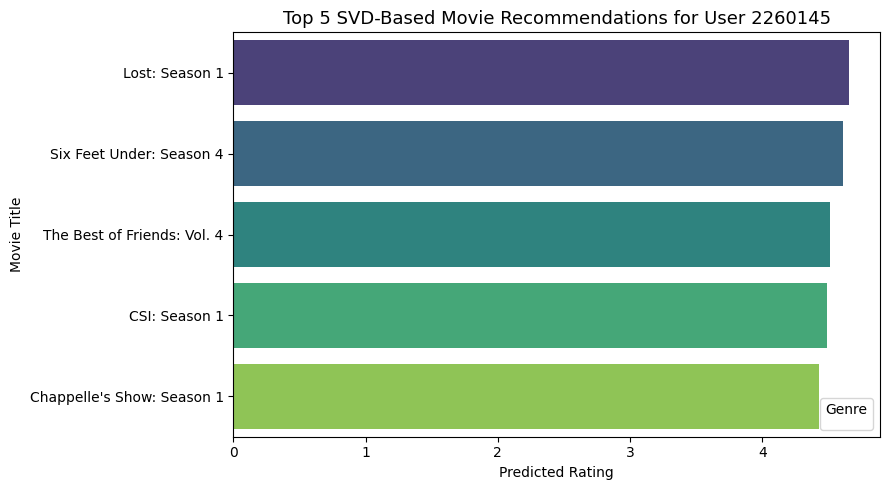

In [38]:

# Visualization
top5_df = pd.DataFrame(top_5_recommendations, columns=['movie_id', 'Predicted Rating'])

top5_df = top5_df.merge(df[['movie_id', 'title', 'year', 'genre']], on='movie_id', how='left').drop_duplicates()

plt.figure(figsize=(9, 5))
sns.barplot(
    data=top5_df,
    x='Predicted Rating',
    y='title',
    hue='title',
    dodge=False,
    palette='viridis'
)
plt.title(f'Top 5 SVD-Based Movie Recommendations for User {sample_user}', fontsize=13)
plt.xlabel('Predicted Rating')
plt.ylabel('Movie Title')
plt.legend(title='Genre', loc='lower right')
plt.tight_layout()
plt.show()